# Shrunken Image Exploration
This notebook shows the progress of developing the method that takes in an image and shrinks it down until the bounding boxe average is less than a certain threshold. It also ensures that the segmentation labels still work properly after the function is applied to the image.

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.insert(0, '../../')
from utils.general import  *

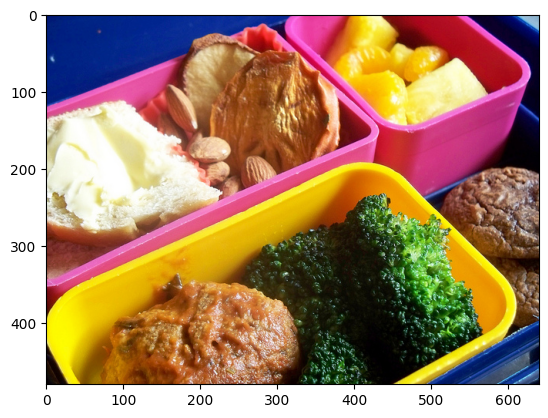

In [3]:
original_img = cv.imread('../images_labels/000000000009.jpg')
original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
plt.imshow(original_img)
plt.show()

In [4]:

labels = pd.DataFrame({'class':[],'segment':[]})

with open('../images_labels/000000000009.txt') as f:
    for line in f:
        split_line = line.split(' ')
        cl = int(split_line[0])
        segment = np.array(split_line[1:], dtype=float)
        row = pd.DataFrame({'class':cl, 'segment': [segment]})
        labels = pd.concat([labels, row], ignore_index=True)

In [5]:
labels.head()

,class,segment
0,45.0,"[0.782016, 0.986521, 0.937078, 0.874167, 0.957..."
1,45.0,"[0.557859, 0.143813, 0.487078, 0.0314583, 0.85..."
2,50.0,"[0.39, 0.727063, 0.418234, 0.649417, 0.455297,..."
3,45.0,"[0.375219, 0.0678333, 0.375219, 0.0590833, 0.3..."
4,49.0,"[0.587812, 0.128229, 0.612281, 0.0965625, 0.66..."


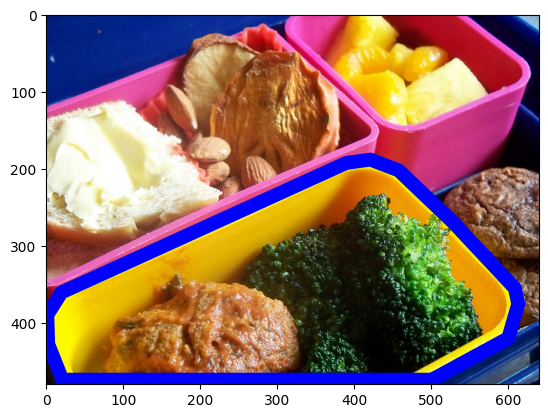

In [6]:
segment = labels.iloc[0]['segment']
segment = segment.reshape(len(segment)//2, 2)
ysize = original_img.shape[0]
xsize = original_img.shape[1]
x = segment[:,0]*xsize
y = segment[:,1]*ysize
plt.imshow(original_img)
plt.plot(np.append(x, x[0]), np.append(y, y[0]), color='blue', linewidth=10)
plt.show()

In [7]:
kernel_size = 2
kernel = np.ones((kernel_size, kernel_size), dtype=float) / kernel_size**2

mean_img = cv.filter2D(original_img, -1, kernel)
smaller_img = mean_img[::kernel_size, ::kernel_size]

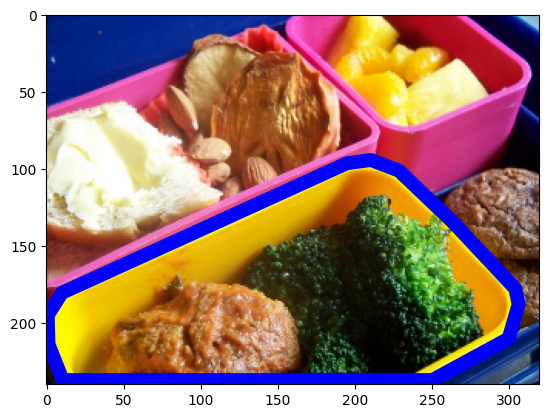

In [8]:
segment = labels.iloc[0]['segment']
segment = segment.reshape(len(segment)//2, 2)
ysize = smaller_img.shape[0]
xsize = smaller_img.shape[1]
x = segment[:,0]*xsize
y = segment[:,1]*ysize
plt.imshow(smaller_img)
plt.plot(np.append(x, x[0]), np.append(y, y[0]), color='blue', linewidth=10)
plt.show()

In [9]:
def shrink_image(img_path, label_path, kernel_size=2, avg_bbox_size=16272):
    bbox_sizes = []
    img = cv.imread(img_path)
    labels = pd.DataFrame({'class':[],'segment':[]})
    kernel = np.ones((kernel_size, kernel_size), dtype=float) / kernel_size**2
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    with open(label_path) as f:
        for line in f:
            split_line = line.split(' ')
            cl = int(split_line[0])
            segment = np.array(split_line[1:], dtype=float)
            row = pd.DataFrame({'class':cl, 'segment': [segment]})
            labels = pd.concat([labels, row], ignore_index=True)
    
    while True: 
        bbox_sizes = []
        mean_img = cv.filter2D(img, -1, kernel)
        smaller_img = mean_img[::kernel_size, ::kernel_size]
        ysize = smaller_img.shape[0]
        xsize = smaller_img.shape[1]
        for idx, row in labels.iterrows():
            segment = row['segment']
            segment = segment.reshape(-1, 2)
            bbox = segment2box(segment)
            print('bbox', bbox)
            print('xysize', xsize, ysize)
            x, y, w, h = bbox
            w*=xsize
            h*=ysize
            bbox_sizes.append(w*h)
        img = smaller_img
        bbox_mean = np.mean(bbox_sizes)
        print(w,h)
        print(bbox_mean)
        if bbox_mean < avg_bbox_size:
            break

    return img, labels

In [14]:
img_path = '../images_labels/000000000009.jpg'
label_path = '../images_labels/000000000009.txt'

img, labels = shrink_image(img_path, label_path)

bbox [  0.0016875     0.39102      0.9573     0.98652]
xysize 320 240
bbox [    0.48708   0.0089792     0.98595      0.4854]
xysize 320 240
bbox [       0.39     0.47765     0.88413     0.98823]
xysize 320 240
bbox [          0    0.028146     0.67888     0.80965]
xysize 320 240
bbox [    0.58781    0.084083     0.70586     0.18102]
xysize 320 240
bbox [    0.72778    0.081187     0.81852     0.17842]
xysize 320 240
bbox [    0.60266     0.15346     0.73394     0.30035]
xysize 320 240
bbox [    0.56883   0.0051875     0.71689     0.15325]
xysize 320 240
229.40511999999998 36.78
33124.366656124796
bbox [  0.0016875     0.39102      0.9573     0.98652]
xysize 160 120
bbox [    0.48708   0.0089792     0.98595      0.4854]
xysize 160 120
bbox [       0.39     0.47765     0.88413     0.98823]
xysize 160 120
bbox [          0    0.028146     0.67888     0.80965]
xysize 160 120
bbox [    0.58781    0.084083     0.70586     0.18102]
xysize 160 120
bbox [    0.72778    0.081187     0.81852     

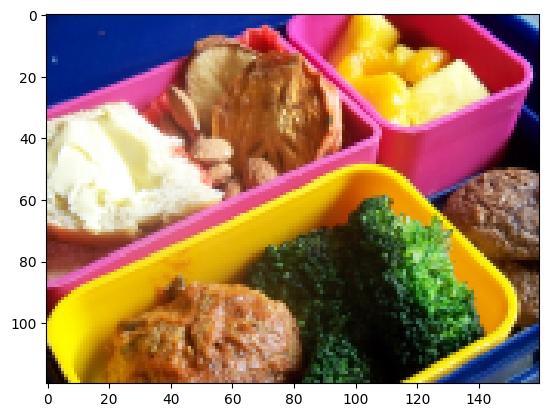

In [15]:
plt.imshow(img)
plt.show()

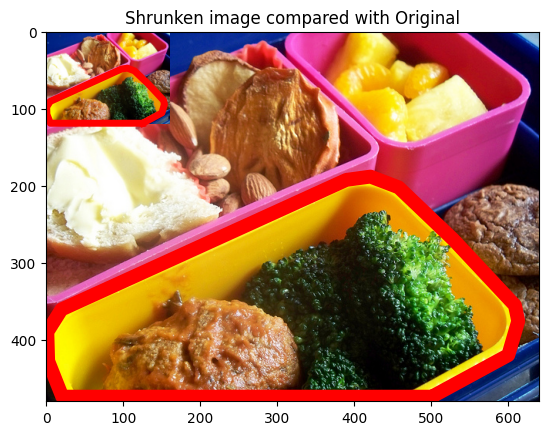

In [16]:
segment = labels.iloc[0]['segment']
segment = segment.reshape(-1, 2)

ysize = original_img.shape[0]
xsize = original_img.shape[1]
x = segment[:,0]*xsize
y = segment[:,1]*ysize
plt.imshow(original_img)
plt.plot(np.append(x, x[0]), np.append(y, y[0]), color='red', linewidth=10)


ysize = img.shape[0]
xsize = img.shape[1]
x = segment[:,0]*xsize
y = segment[:,1]*ysize
plt.imshow(img)
plt.plot(np.append(x, x[0]), np.append(y, y[0]), color='red', linewidth=5)
# plt.axis('off')
plt.title("Shrunken image compared with Original")
plt.show()